In [21]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
import matplotlib
from matplotlib import pyplot as plt
# sns.set_style("whitegrid")
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [23]:
root_paths=[
    '../results/ERA5v00/ERA5v00_CAE_h32_k5_ReZero_default_none_none',
    '../results/ERA5v00/ERA5v00_AEflow_b4_k5_ReZero_default_none_none',
    '../results/ERA5v00/ERA5v00_SINRv11_default_NeuralODE_no_exp_none_none',
    '../results/ERA5v00/ERA5v00_SINRv11_1024d_NeuralODE_no_exp_lr0.01_none_none',
    # '../results/ERA5v00/ERA5v00_SINRv11_default_NeuralODE_no_exp_scalar_default',
]

In [24]:

import glob

df = pd.concat(
    [
    pd.concat(
        [pd.read_pickle(f) 
         for f in glob.glob(root_path + "/*dataframe.pkl")],
        ignore_index=True)
    for root_path in root_paths
],
    ignore_index=True)
df

,kf_name,step,feature_idx,rmse,ed_name,ld_name,ue_name,ens_num,infl,sigma_z_b,sigma_m
0,EnKF,0,0,0.061281,CAE_h32_k5,ReZero_default,none_none,32,1.05,0.03,0.010
1,EnKF,0,1,0.107945,CAE_h32_k5,ReZero_default,none_none,32,1.05,0.03,0.010
2,EnKF,1,0,0.062640,CAE_h32_k5,ReZero_default,none_none,32,1.05,0.03,0.010
3,EnKF,1,1,0.108514,CAE_h32_k5,ReZero_default,none_none,32,1.05,0.03,0.010
4,EnKF,2,0,0.064279,CAE_h32_k5,ReZero_default,none_none,32,1.05,0.03,0.010
...,...,...,...,...,...,...,...,...,...,...,...
1002955,ETKF-Q,196,1,0.605464,SINRv11_1024d,NeuralODE_no_exp_lr0.01,none_none,32,1.10,0.01,0.003
1002956,ETKF-Q,197,0,0.671349,SINRv11_1024d,NeuralODE_no_exp_lr0.01,none_none,32,1.10,0.01,0.003
1002957,ETKF-Q,197,1,0.609958,SINRv11_1024d,NeuralODE_no_exp_lr0.01,none_none,32,1.10,0.01,0.003
1002958,ETKF-Q,198,0,0.676203,SINRv11_1024d,NeuralODE_no_exp_lr0.01,none_none,32,1.10,0.01,0.003


# Renaming

In [25]:
df[df == 'CAE_h32_k5'] = 'CAE'
df[df == 'AEflow_b4_k5'] = 'AEflow'
df[df == 'SINRv11_default'] = 'SINR'
df[df == 'SINRv11_1024d'] = 'SINR(1024)'

df[df == 'ReZero_default'] = '+ReZero'
df[df == 'NeuralODE_no_exp'] = '+NeuralODE'
df[df == 'NeuralODE_no_exp_lr0.01'] = '+NeuralODE'
df[df == 'none_none'] = ''
df[df == 'diagonal_default'] = '+diagonal'
df[df == 'scalar_default'] = '+scalar'

In [26]:
df['model'] = df['ed_name'] + df['ld_name'] + df['ue_name']

# df['model'] = df['ed_name'] + '+' + df['ld_name'] + '+' + df['ue_name']
# df[df == 'CAE+ReZero+none'] = 'CAE+ReZero'
# df[df == 'SINR+NeuralODE+none'] = 'SINR+NeuralODE (LAINR, ours)'
# df[df == 'SINR+NeuralODE+diagonal'] = 'SINR+NeuralODE w/ est. (LAINR, ours)'
df.drop(columns=['ed_name', 'ld_name', 'ue_name'], inplace=True)
print('#trajs:', len(df) / 199 / 2)
df

#trajs: 2520.0


,kf_name,step,feature_idx,rmse,ens_num,infl,sigma_z_b,sigma_m,model
0,EnKF,0,0,0.061281,32,1.05,0.03,0.010,CAE+ReZero
1,EnKF,0,1,0.107945,32,1.05,0.03,0.010,CAE+ReZero
2,EnKF,1,0,0.062640,32,1.05,0.03,0.010,CAE+ReZero
3,EnKF,1,1,0.108514,32,1.05,0.03,0.010,CAE+ReZero
4,EnKF,2,0,0.064279,32,1.05,0.03,0.010,CAE+ReZero
...,...,...,...,...,...,...,...,...,...
1002955,ETKF-Q,196,1,0.605464,32,1.10,0.01,0.003,SINR(1024)+NeuralODE
1002956,ETKF-Q,197,0,0.671349,32,1.10,0.01,0.003,SINR(1024)+NeuralODE
1002957,ETKF-Q,197,1,0.609958,32,1.10,0.01,0.003,SINR(1024)+NeuralODE
1002958,ETKF-Q,198,0,0.676203,32,1.10,0.01,0.003,SINR(1024)+NeuralODE


In [27]:
df['sigma_z_b'].fillna(-1, inplace=True)
df['sigma_m'].fillna(-1, inplace=True)
df_grouped = df.groupby(['ens_num', 'model', 'infl', 'sigma_z_b', 'sigma_m', 'kf_name'])['rmse'].mean()
print('trajs:', len(df) / 199 / 2)
print(f'{len(df_grouped)=}')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_grouped)
# df

trajs: 2520.0
len(df_grouped)=2520
ens_num  model                 infl  sigma_z_b  sigma_m  kf_name
32       AEflow+ReZero         1.02  0.01       0.0001   DEnKF      0.335649
                                                         ETKF       0.338920
                                                         ETKF-Q     0.368195
                                                         EnKF       0.360908
                                                         SEnKF      0.389173
                                                0.0003   DEnKF      0.326027
                                                         ETKF       0.328587
                                                         ETKF-Q     0.358960
                                                         EnKF       0.350782
                                                         SEnKF      0.389172
                                                0.0010   DEnKF      0.322408
                                                     

In [28]:
df_avg_rmse = df_grouped.reset_index()
with pd.option_context('display.max_rows', 30, 'display.max_columns', None):
    display(df_avg_rmse)


,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,rmse
0,32,AEflow+ReZero,1.02,0.01,0.0001,DEnKF,0.335649
1,32,AEflow+ReZero,1.02,0.01,0.0001,ETKF,0.338920
2,32,AEflow+ReZero,1.02,0.01,0.0001,ETKF-Q,0.368195
3,32,AEflow+ReZero,1.02,0.01,0.0001,EnKF,0.360908
4,32,AEflow+ReZero,1.02,0.01,0.0001,SEnKF,0.389173
...,...,...,...,...,...,...,...
2515,64,SINR+NeuralODE,1.10,0.10,0.1000,DEnKF,0.190934
2516,64,SINR+NeuralODE,1.10,0.10,0.1000,ETKF,0.205035
2517,64,SINR+NeuralODE,1.10,0.10,0.1000,ETKF-Q,0.204346
2518,64,SINR+NeuralODE,1.10,0.10,0.1000,EnKF,0.195236


In [29]:
df_avg_rmse['kf_id'] = df_avg_rmse['kf_name'].map({
    'EnKF': 0,
    'SEnKF': 1,
    'DEnKF': 2,
    'ETKF': 3,
    'ETKF-Q': 4,
})
df_avg_rmse.sort_values(by=['kf_id'], kind='stable', inplace=True)
df_avg_rmse = df_avg_rmse.reset_index(drop=True)
with pd.option_context('display.max_rows', 50, 'display.max_columns', None):
    display(df_avg_rmse)

,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,rmse,kf_id
0,32,AEflow+ReZero,1.02,0.01,0.0001,EnKF,0.360908,0
1,32,AEflow+ReZero,1.02,0.01,0.0003,EnKF,0.350782,0
2,32,AEflow+ReZero,1.02,0.01,0.0010,EnKF,0.340482,0
3,32,AEflow+ReZero,1.02,0.01,0.0030,EnKF,0.353033,0
4,32,AEflow+ReZero,1.02,0.01,0.0100,EnKF,0.385401,0
...,...,...,...,...,...,...,...,...
2515,64,SINR+NeuralODE,1.10,0.10,0.0010,ETKF-Q,0.203254,4
2516,64,SINR+NeuralODE,1.10,0.10,0.0030,ETKF-Q,0.203380,4
2517,64,SINR+NeuralODE,1.10,0.10,0.0100,ETKF-Q,0.203355,4
2518,64,SINR+NeuralODE,1.10,0.10,0.0300,ETKF-Q,0.203791,4


In [30]:
df_avg_rmse[df_avg_rmse['model'] == 'SINR+NeuralODE+scalar'][df['sigma_z_b'] > 0]

/tmp/ipykernel_2869/1433739621.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_avg_rmse[df_avg_rmse['model'] == 'SINR+NeuralODE+scalar'][df['sigma_z_b'] > 0]


,ens_num,model,infl,sigma_z_b,sigma_m,kf_name,rmse,kf_id


In [31]:
for model in df_avg_rmse['model'].unique():
    print(model)
    for column_name in ['kf_name', 'ens_num', 'infl', 'sigma_z_b', 'sigma_m']:
        print(f'\t{column_name}: {df_avg_rmse[df_avg_rmse["model"]==model][column_name].unique()}')


AEflow+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
CAE+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
SINR(1024)+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
SINR+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [32 64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]


In [32]:
df_avg_rmse = df_avg_rmse[df_avg_rmse['ens_num'] == 64]
# df_avg_rmse = df_avg_rmse[df_avg_rmse['infl'] == 1.05]

# df_avg_rmse = df_avg_rmse[df_avg_rmse['sigma_m'].apply(lambda x: x < 0 or (x > 5e-4))]
# df_avg_rmse = df_avg_rmse[df_avg_rmse['sigma_m'] > 5e-4]

bar size: 63 | AEflow+ReZero: 2.7494e-01, DEnKF, sigma_z_b=0.01, sigma_m=0.001, infl=1.05
bar size: 63 | CAE+ReZero: 3.1277e-01, ETKF, sigma_z_b=0.01, sigma_m=0.003, infl=1.1
bar size: 63 | SINR(1024)+NeuralODE: 2.2993e-01, ETKF, sigma_z_b=0.1, sigma_m=0.01, infl=1.02
bar size: 63 | SINR+NeuralODE: 1.4504e-01, ETKF, sigma_z_b=0.1, sigma_m=0.01, infl=1.02
AEflow+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
CAE+ReZero
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
SINR(1024)+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' 'ETKF-Q']
	ens_num: [64]
	infl: [1.02 1.05 1.1 ]
	sigma_z_b: [0.01 0.03 0.1 ]
	sigma_m: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.1   ]
SINR+NeuralODE
	kf_name: ['EnKF' 'SEnKF' 'DEnKF' 'ETKF' '

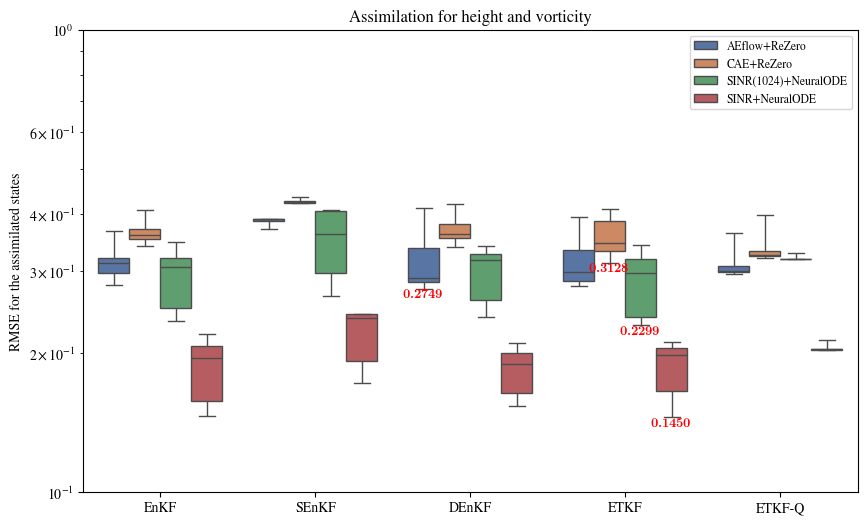

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.boxplot(df_avg_rmse, x='kf_name', y='rmse',
                 hue='model', palette='deep',
                 whis=(0, 100),
                 ax=ax
                 )

ax.set_yscale('log')
ax.set_ylim(1e-1, 1.)
ax.set_xlabel('')
ax.set_ylabel('RMSE for the assimilated states')
ax.set_title('Assimilation for height and vorticity')
ax.legend(fontsize='small')

# annotate the minimal value for each model
models = df_avg_rmse['model'].unique()
for xoffset, model in zip(np.linspace(-.4 + .4 / len(models), .4 - .4 / len(models), len(models)), models):
    df_model = df_avg_rmse[df_avg_rmse['model'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print('bar size:', len(df_model[df_model['kf_name'] == 'EnKF']), end=' | ')
    print(
        f'{model}: {min_value:.4e}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}, infl={min_row["infl"]}')
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
                xy=(x_idx + xoffset, min_value),
                xytext=(0, -.2),
                textcoords='offset points',
                ha='center', va='top', color='r',
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

# plt.savefig('sw_assimilate_boxfig.pdf', bbox_inches='tight')

for model in df_avg_rmse['model'].unique():
    print(model)
    for column_name in ['kf_name', 'ens_num', 'infl', 'sigma_z_b', 'sigma_m']:
        print(f'\t{column_name}: {df_avg_rmse[df_avg_rmse["model"]==model][column_name].unique()}')

In [34]:
df_avg_rmse[df_avg_rmse == 'SINR+NeuralODE+scalar'] = 'SINR+NeuralODE+scalar (LAINR w/ u.e.)'
df_avg_rmse[df_avg_rmse == 'SINR+NeuralODE+diagonal'] = 'SINR+NeuralODE+diagonal (LAINR w/ u.e.)'
df_avg_rmse[df_avg_rmse == 'SINR+NeuralODE'] = 'SINR+NeuralODE (LAINR w/o u.e.)'

In [35]:
df_avg_rmse['model'].unique()

array(['AEflow+ReZero', 'CAE+ReZero', 'SINR(1024)+NeuralODE',
       'SINR+NeuralODE (LAINR w/o u.e.)'], dtype=object)

bar size: 63 | CAE+ReZero: 3.1277e-01, ETKF, sigma_z_b=0.01, sigma_m=0.003, infl=1.1
bar size: 63 | AEflow+ReZero: 2.7494e-01, DEnKF, sigma_z_b=0.01, sigma_m=0.001, infl=1.05
bar size: 63 | SINR+NeuralODE (LAINR w/o u.e.): 1.4504e-01, ETKF, sigma_z_b=0.1, sigma_m=0.01, infl=1.02


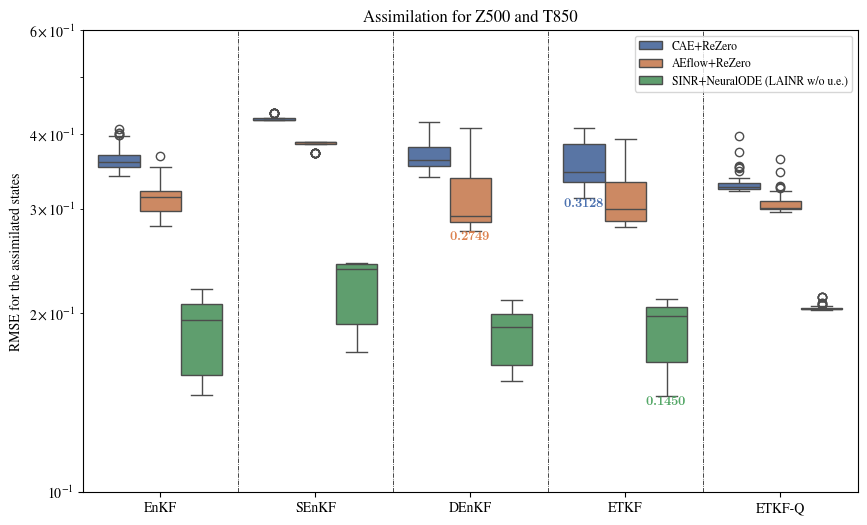

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

models = 'CAE+ReZero', 'AEflow+ReZero', 'SINR+NeuralODE (LAINR w/o u.e.)'

df_plot = pd.concat([
    df_avg_rmse[df_avg_rmse['model'] == 'CAE+ReZero'],
    df_avg_rmse[df_avg_rmse['model'] == 'AEflow+ReZero'],
    df_avg_rmse[df_avg_rmse['model'] == 'SINR+NeuralODE (LAINR w/o u.e.)']
])

# df_plot[df_plot['model'] == 'SINR+NeuralODE'] = 'SINR+NeuralODE (LAINR, ours)'

models_ue = [
    'SINR+NeuralODE+diagonal (LAINR w/ u.e.)',
    'SINR+NeuralODE+scalar (LAINR w/ u.e.)',
]


palette_name = 'deep'

ax = sns.boxplot(df_plot, x='kf_name', y='rmse',
                 hue='model', palette=palette_name,
                #  whis=(0, 100),
                 ax=ax
                 )

ax.set_yscale('log')
ax.set_ylim(.1, .6)
ax.set_xlabel('')
ax.set_ylabel('RMSE for the assimilated states')
ax.set_title('Assimilation for Z500 and T850')

colors = sns.palettes.color_palette(palette_name, len(models) + len(models_ue))

# annotate the minimal value for each model
for k, (xoffset, model) in enumerate(zip([-.8 / 3, 0, .8 / 3], models)):
    df_model = df_plot[df_plot['model'] == model]
    min_idx = df_model['rmse'].argmin()
    min_row = df_model.iloc[min_idx]
    min_value = min_row['rmse']
    x_idx = list(df_model['kf_name'].unique()).index(min_row['kf_name'])
    print('bar size:', len(df_model[df_model['kf_name'] == 'EnKF']), end=' | ')
    print(
        f'{model}: {min_value:.4e}, {min_row["kf_name"]}, sigma_z_b={min_row["sigma_z_b"]}, sigma_m={min_row["sigma_m"]}, infl={min_row["infl"]}')
    ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}'                # +f'\n$\\sigma^m={min_row["sigma_m"]}$, $\\sigma_z^b={min_row["sigma_z_b"]}$'
                ,
                xy=(x_idx + xoffset, min_value),
                xytext=(0, -.2),
                textcoords='offset points',
                ha='center', va='top', color=colors[k],
                # weight='bold',
                usetex=True,
                # arrowprops=dict(facecolor='black', shrink=0.05),
                )

# for k, model in enumerate(models_ue):

#     xlocs = []
#     ylocs = []

#     df_anno = df_avg_rmse[df_avg_rmse['model'] == model]
#     # add diagonal estimator
#     for xtick in ax.get_xticks():
#         # idx = df[df['error']==min_value[xtick]].index.values
#         df_anno_value = df_anno[df_anno['kf_name'] == df_plot['kf_name'].unique()[xtick]]['rmse'].min()
#         # ax.text(xtick, low_whisker - 2, text,
#         #               horizontalalignment='center', size='x-small', weight='semibold')
#         print(df_anno_value)
#         xlocs.append(xtick + .4 - .8 / len(models) / 2)
#         ylocs.append(df_anno_value)
#         # if xtick == 0:
#         #     ax.scatter(xtick + .4 - .8 / len(models) / 2, df_anno_value, marker='D',
#         #             color=colors[len(colors) - k - 1], label='w/ ' + model.split('+')[-1])
#         # else:
#         #     ax.scatter(xtick + .4 - .8 / len(models) / 2, df_anno_value, marker='D',
#         #             color=colors[len(colors) - k - 1])

#     ax.scatter(
#         xlocs, ylocs, marker='D', color=colors[len(colors) - k - 1], label=model, zorder=100)

#     # add diagonal estimator minimum
#     min_idx = df_anno['rmse'].argmin()
#     min_row = df_anno.iloc[min_idx]
#     min_value = min_row['rmse']
#     min_kf_idx = list(df_anno['kf_name'].unique()).index(min_row['kf_name'])
#     ax.annotate(r'\small\textbf{' + f'{min_value:.4f}' + r'}',
#                 xy=(min_kf_idx + .4 - .8 / len(models) / 2 - .05, min_value),
#                 xytext=(-30, -3),
#                 textcoords='offset points',
#                 arrowprops=dict(arrowstyle="->", color=colors[len(colors) - k - 1]),
#                 ha='right', va='top', color=colors[len(colors) - k - 1],
#                 # weight='bold',
#                 usetex=True,
#                 )


ax.legend(fontsize='small')
for x in ax.get_xticks()[:-1]:
    ax.axvline(x + .5, color='k', linestyle='-.', linewidth=.5)
ax.set_xlim(-.5, 4.5)
plt.savefig('era5_assimilate_boxfig.pdf', bbox_inches='tight')